# Infectious Diseases in Jakarta - Explaratory Data Analysis

According to [mayoclinic.org](https://www.alodokter.com/penyakit-menular-yang-umum-di-indonesia), infectious diseases are disorders caused by organisms — such as bacteria, viruses, fungi or parasites. Many organisms live in and on our bodies. They're normally harmless or even helpful. But under certain conditions, some organisms may cause disease.

Some examples of infectious diseases are:
*   Acute Respiratory Infection (ARI)
*   Diarrhea
*   Tuberculosis (TB)
*   Dengue Haemorrhagic Fever (DHF)
*   Malaria
*   etc.

Infectious diseases can be transmitted directly or indirectly. Infectious diseases can be prevented by doing healthy living habits. These include not spitting carelessly, washing hands, not using personal equipment together with other people, and eating healthy and nutritious food to increase the body's resistance to disease.

Based on the [2020 Census](https://jakarta.bps.go.id/pressrelease/2021/01/22/541/jumlah-penduduk-hasil-sp2020-provinsi-dki-jakarta-sebesar-10-56-juta-jiwa.html), the population in Jakarta in September 2020 was 10.56 million people. Compared to 2010, the population in Jakarta has increased by around 954 thousand people, or an average of 88 thousand people every year. This highly increasing population in DKI Jakarta certainly causes various problems such as traffic jam, flooding, air pollution, and health issues.

This time, I will do an exploratory data analysis of the number of infectious disease cases in Jakarta. The data was obtained from [data.jakarta.go.id](https://data.jakarta.go.id/dataset/data-jumlah-penderita-penyakit-menular-menurut-jenis-penyakit-di-provinsi-dki-jakarta) and I have translated to english then merged it into one csv file. The programming language that I'm using is **Python**.

## 1. Import Packages

We will use  pandas, matplotlib, and seaborn for this analysis.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Data

In [ ]:
data = pd.read_csv("InfectiousDiseasesJakarta.csv")
print(data)

     year            region disease_name  number_of_cases
0    2015  Thousand Islands      Malaria                0
1    2015     South Jakarta      Malaria                6
2    2015      East Jakarta      Malaria                2
3    2015   Central Jakarta      Malaria                4
4    2015      West Jakarta      Malaria                5
..    ...               ...          ...              ...
211  2020     South Jakarta          DHF             1020
212  2020      East Jakarta          DHF             1544
213  2020   Central Jakarta          DHF              367
214  2020      West Jakarta          DHF             1266
215  2020     North Jakarta          DHF              542

[216 rows x 4 columns]


The data that we are using is a comma separated value (csv) file named `InfectiousDiseasesJakarta.csv`. The data is imported using pandas and stored into a variable caled “data”. It can be seen that data has 216 rows (number of observations) and 4 columns (number of variables).

We can search for unique values in “year”, “region”, and “disease_name” column with:


In [ ]:
print(data['year'].unique())
print(data['region'].unique())
print(data['disease_name'].unique())

[2015 2016 2017 2018 2019 2020]
['Thousand Islands' 'South Jakarta' 'East Jakarta' 'Central Jakarta'
 'West Jakarta' 'North Jakarta']
['Malaria' 'Gastro Entritis' 'Cholera' 'Leprosy' 'TBC' 'DHF']


*   'year' column contains observation years from 2015 until 2020.
*   ‘region’ column contains region names that consists of: Thousand Islands, South Jakarta, East Jakarta, Central Jakarta, West Jakarta, and North Jakarta.
*   'disease_name' column contains disease names that consists of: Malaria, Gastro Entritis, Cholera, Leprosy, TBC, and DHF.

## 3. Changing Data Type

To see the data types for each columns, we can use this command:


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             216 non-null    int64 
 1   region           216 non-null    object
 2   disease_name     216 non-null    object
 3   number_of_cases  216 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.9+ KB
None


It can be seen that 'year' and ‘number_of_cases’ column are integers, 'region' and 'disease_name' are objects. For further analysis, we will change ‘year’, ‘region’, and ‘disease_name’ into category.

In [ ]:
data['year']=data['year'].astype('category')
data['region']=data['region'].astype('category')
data['disease_name']=data['disease_name'].astype('category')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   year             216 non-null    category
 1   region           216 non-null    category
 2   disease_name     216 non-null    category
 3   number_of_cases  216 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 3.1 KB
None


Using that command, we have successfully changed the data type of ‘year’, ‘region’, dan ‘disease_name’ column into category.

## 4. Checking Missing Value

In [ ]:
print(data.isnull().sum())

year               0
region             0
disease_name       0
number_of_cases    0
dtype: int64


The sum of missing values for each columns are 0, it means that the data is clean and we can proceed our analysis. 

## 5. Line Plot for Number of Infectious Disease Cases Each Year

year
2015    28499
2016    49186
2017    71012
2018    73871
2019    82363
2020    42315
Name: number_of_cases, dtype: int64


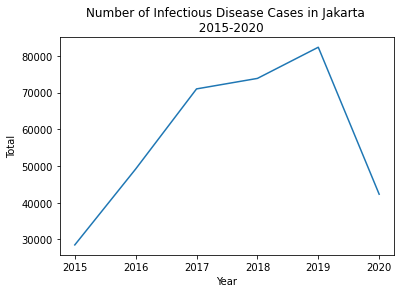

In [ ]:
yearly = data.groupby('year').number_of_cases.sum()
print(yearly)
yearly.plot(kind='line',xlabel='Year',ylabel='Total',title='Number of Infectious Disease Cases in Jakarta \n  2015-2020')

To see the number of infectious disease cases each year, we can do grouping in the 'year' column. After that the values ​​in the 'number_of_cases' column will be summed for each group. The grouped data is stored into "yearly" variable. After that, the function creates a plot using pandas.

Based on the plot, the number of infectious disease cases in Jakarta has **increased** since 2015 to its peak in 2019. In 2019, the number of infectious disease cases reached 82,363 cases. However, in 2020 the number of cases **decreased** by almost 50% to 42,315 cases.

We can also see the number of infectious disease cases grouped by disease name each year by creating a pivot table. To do this, we can use this command:

disease_name  Cholera          DHF  ...    Malaria          TBC
year                                ...                        
2015              0.0   838.666667  ...   3.333333  3855.000000
2016              0.0  3405.333333  ...   8.000000  4732.666667
2017              0.0   560.333333  ...  10.333333  6410.000000
2018              0.0   442.333333  ...  10.500000  6164.833333
2019              0.0  1450.833333  ...   9.666667  6578.333333
2020             27.0   790.666667  ...  10.000000  3692.666667

[6 rows x 6 columns]


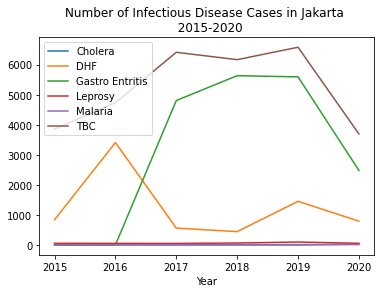

In [ ]:
trend = pd.pivot_table(data, index='year', columns='disease_name', values='number_of_cases')
print(trend)
trend.plot(kind='line',xlabel='Year', title='Number of Infectious Disease Cases in Jakarta \n  2015-2020').legend(loc='upper left')

The plot tells us that there are 3 diseases with a significant number of cases: DHF, gastroenteritis, and tuberculosis. Among the three, the highest number of cases is tuberculosis followed by gastroenteritis and DHF consecutively.

## 6. Bar Chart for Number of Infectious Disease Cases

To create a bar chart for number of infectious disease cases, we will create a function named “PlotGroup”. This function will sum the number of cases based on the group and create a bar chart using pandas. The command for this function is:

In [ ]:
def PlotGroup(group,title):
    data_a = data.groupby(group).number_of_cases.sum().sort_values()
    print(data_a)
    data_a.plot(kind="barh",title=title)

The PlotGroup function needs 2 arguments:
1.   group : The categorical column that will be group by.
2.   title : Plot title

Next, we will make a bar chart for the number of infectious disease cases in Jakarta grouped by "disease_name".


disease_name
Cholera               162
Malaria               311
Leprosy              2196
DHF                 44929
Gastro Entritis    111047
TBC                188601
Name: number_of_cases, dtype: int64


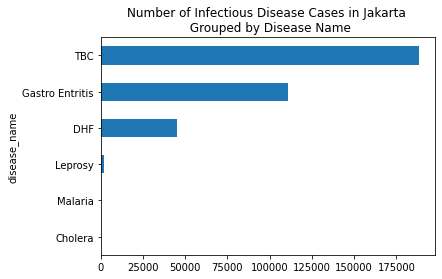

In [ ]:
PlotGroup(group='disease_name',title='Number of Infectious Disease Cases in Jakarta \n Grouped by Disease Name')

From the output and the bar chart, we can verify our previous assumption that there are 3 diseases with a significant number of cases, they are tuberculosis, gastroenteritis, and DHF. We can see the total number of cases for each disease in the output.

We can also make a bar chart for the number of infectious disease cases in Jakarta grouped by region:

region
Thousand Islands       388
Central Jakarta      46002
North Jakarta        50019
South Jakarta        64167
West Jakarta         76418
East Jakarta        110252
Name: number_of_cases, dtype: int64


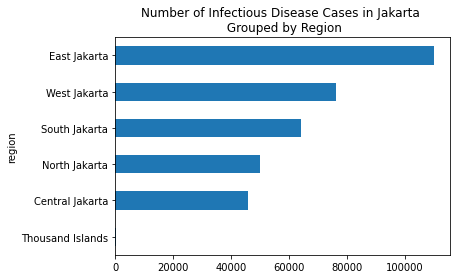

In [ ]:
PlotGroup(group='region',title="Number of Infectious Disease Cases in Jakarta \n Grouped by Region")

From the output and the bar chart, we can see that East Jakarta has the highest number of infectious disease cases with a total of 110,252 cases then followed by West Jakarta (76,418), South Jakarta (64,167), North Jakarta (50,019), Central Jakarta (46.002), and the Thousand Islands (388).

## 7. Bar Chart with Multicategory (Grid)

To be able to see the whole data in a plot, we can create a function called “PlotGrid”. The command for the function is:

In [ ]:
def PlotGrid(x, column, title):
    sns.set_style('darkgrid')
    g1=sns.catplot(x=x,y='number_of_cases', col=column, data=data, kind='bar',ci=None,col_wrap=3,height=5,sharey=False)
    g1.fig.subplots_adjust(top=0.9)
    g1.fig.suptitle(title,fontsize=19)
    g1.set_xticklabels(rotation=30)
    plt.show()
    plt.clf()

The PlotGrid function needs 3 arguments:
1.   x : The categorical column that will be place at the x axis.
2.   column : The categorical column that will seperate the bar chart.
3.   title : Plot title

For example, we will create a bar chart for the number of infectious disease cases based on the disease name and the bar chart is separated by year:

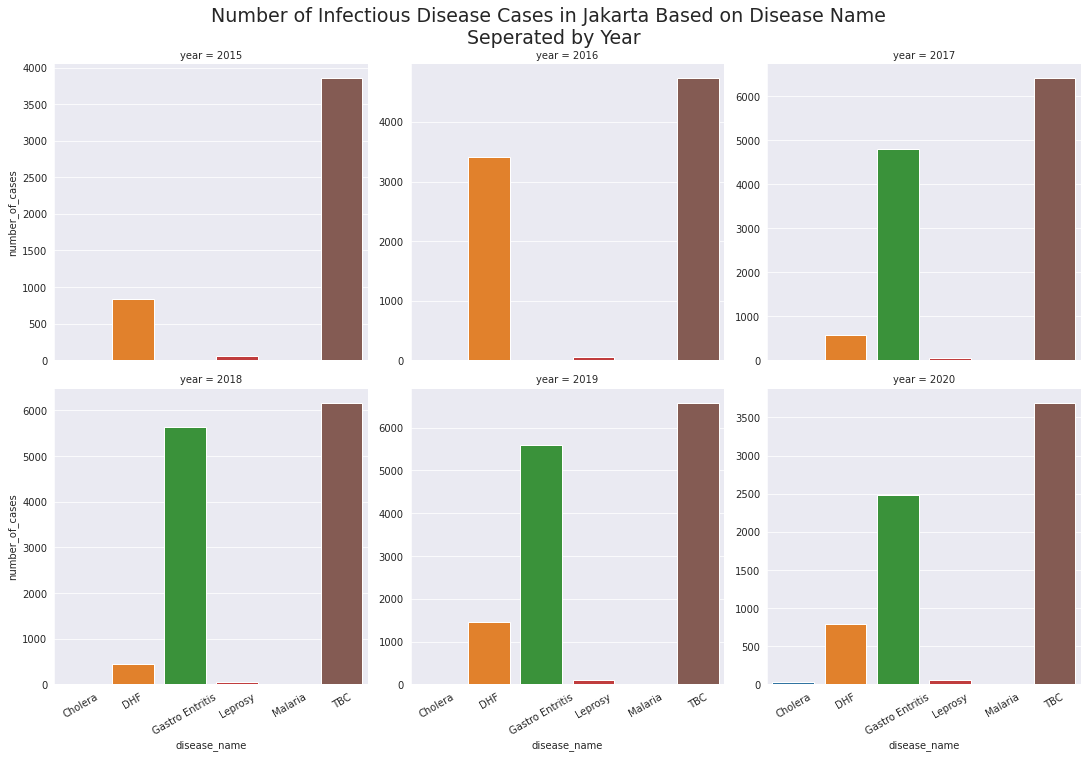

<Figure size 432x288 with 0 Axes>

In [ ]:
PlotGrid(x='disease_name',column='year',title="Number of Infectious Disease Cases in Jakarta Based on Disease Name \n Seperated by Year")

The chart is very useful because we can see what diseases have the highest number of cases each year. In 2015 and 2016, infectious diseases in DKI Jakarta were dominated by tuberculosis and DHF. The highest number of dengue cases occurred in 2016. In 2017–2020, infectious diseases in DKI Jakarta were dominated by tuberculosis and gastroenteritis.

Next, we can find out the number of cases based on the disease name in each region with:

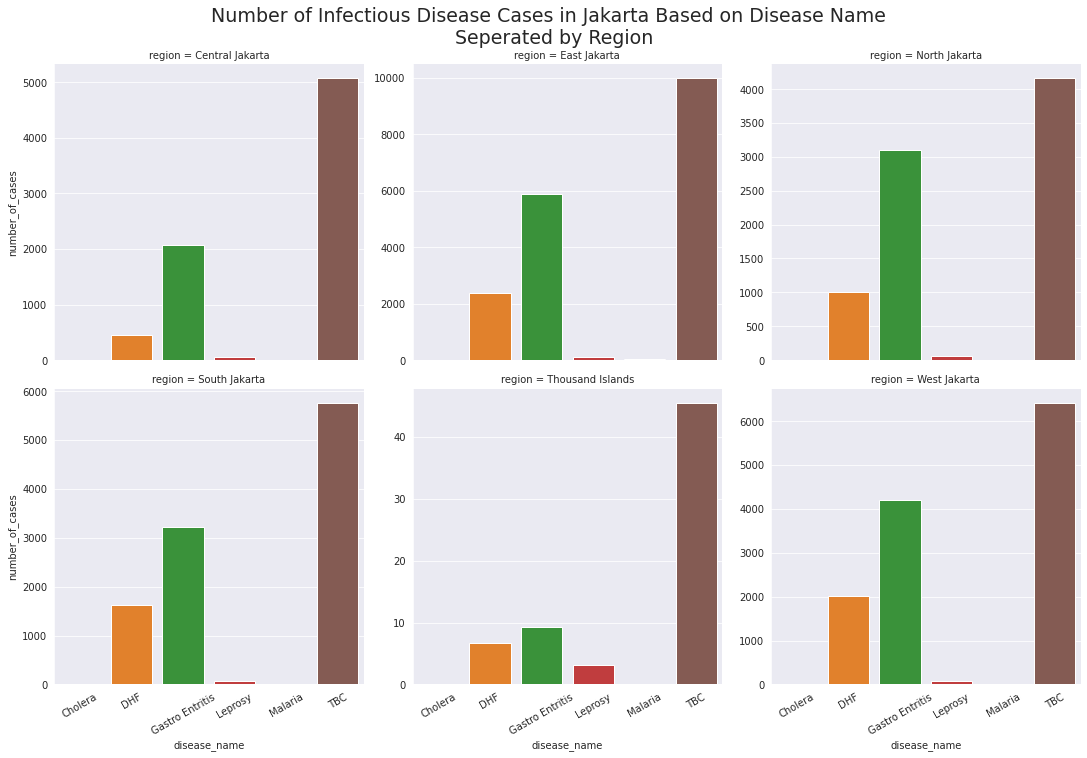

<Figure size 432x288 with 0 Axes>

In [ ]:
PlotGrid(x='disease_name',column='region',title="Number of Infectious Disease Cases in Jakarta Based on Disease Name \n Seperated by Region")

From the chart, it can be seen that tuberculosis has the highest number of cases in every region then followed by gastroenteritis.

Finally, we can see the number of cases based on region for each year with:


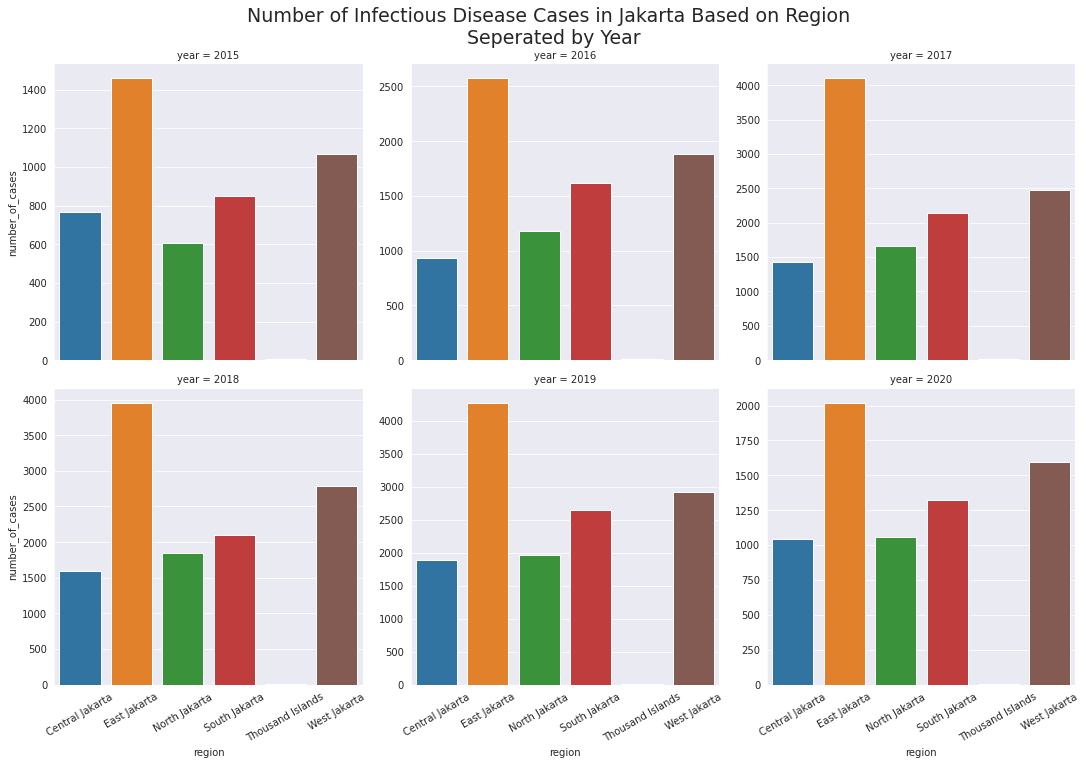

<Figure size 432x288 with 0 Axes>

In [ ]:
PlotGrid(x='region',column='year',title="Number of Infectious Disease Cases in Jakarta Based on Region \n Seperated by Year")

From the chart, we can see that the number of infectious disease cases in East Jakarta has the highest number of cases in every year. It then followed by West Jakarta and South Jakarta. The number of infectious disease cases in Thousand Islands, Central Jakarta, and North Jakarta fluctuate every year.

# Conclusion


1.   The number of infectious disease cases in Jakarta from 2015 to 2019 tends to increase and reaches its peak in 2019 with 82,363 cases. The number of cases then decreased by almost 50% in 2020 with 42,315 cases.
2.   From 2015 until 2020, TB (tuberculosis) has the highest number of infectious disease cases with 188,601 cases. Gastroenteritis was second highest cases with 111,047 cases then followed by DHF (dengue hemorrhagic fever) with 44,929 cases.
3.   Infectious diseases that dominate in DKI Jakarta every year was tuberculosis and gastroenteritis. These two diseases are also have the highest number of cases in each region.
4.   East Jakarta has the highest number of infectious disease cases both in every year and each year. It then followed by West Jakarta and South Jakarta.

Thats all of the exploratory data analysis that I can explain. I hope these results can be useful as a consideration for policy making or further research. If you are interested in this project, you can access the dataset and syntax on [my GitHub](https://github.com/radianlukman/Penyakit-Menular-DKI-Jakarta).

Thank you!